In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import numpy as np
import scipy.stats as stats
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('population-nairobi-1950-2035.csv')
df

,date,Population,Annual Change
0,1950-12-31,137000,NaN
1,1951-12-31,148000,8.03
2,1952-12-31,160000,8.11
3,1953-12-31,172000,7.50
4,1954-12-31,186000,8.14
...,...,...,...
81,2031-12-31,7309000,3.95
82,2032-12-31,7594000,3.90
83,2033-12-31,7888000,3.87
84,2034-12-31,8190000,3.83


In [3]:
df = df.rename(columns={
    ' Population': 'Population',
    ' Annual Change': 'Annual Change'
})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           86 non-null     object 
 1   Population     86 non-null     int64  
 2   Annual Change  85 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,Population,Annual Change
count,8.600000e+01,85.000000
mean,2.431709e+06,4.984118
std,2.306354e+06,1.323205
min,1.370000e+05,3.770000
25%,5.640000e+05,3.890000
50%,1.557000e+06,4.840000
75%,3.732750e+06,5.050000
max,8.499000e+06,8.150000


### Handling Missing Values

In [6]:
df.isna().sum()

date             0
Population       0
Annual Change    1
dtype: int64

In [7]:
median = df.dropna().median()
# fill in missing value with median
df = df.fillna(median)

In [8]:
df

,date,Population,Annual Change
0,1950-12-31,137000,4.84
1,1951-12-31,148000,8.03
2,1952-12-31,160000,8.11
3,1953-12-31,172000,7.50
4,1954-12-31,186000,8.14
...,...,...,...
81,2031-12-31,7309000,3.95
82,2032-12-31,7594000,3.90
83,2033-12-31,7888000,3.87
84,2034-12-31,8190000,3.83


### Outliers

<AxesSubplot:xlabel='Annual Change'>

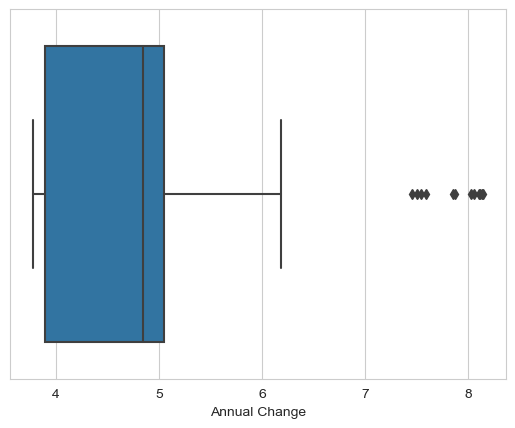

In [9]:
sns.boxplot(df['Annual Change'])

In [10]:
def detect_outliers(dataset, columns):
    df = dataset.copy()
    df[columns] = stats.zscore(df[columns])
    outliers = df[(df[columns] < -3) | (df[columns] > 3)]
    print(f"The number of outliers: {outliers.shape[0]}")
detect_outliers(df,'Annual Change')
detect_outliers(df,'Population')

The number of outliers: 0
The number of outliers: 0


In [11]:
df

,date,Population,Annual Change
0,1950-12-31,137000,4.84
1,1951-12-31,148000,8.03
2,1952-12-31,160000,8.11
3,1953-12-31,172000,7.50
4,1954-12-31,186000,8.14
...,...,...,...
81,2031-12-31,7309000,3.95
82,2032-12-31,7594000,3.90
83,2033-12-31,7888000,3.87
84,2034-12-31,8190000,3.83


In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['Year'] = df['date'].dt.year

In [14]:
df.Population.unique()

array([ 137000,  148000,  160000,  172000,  186000,  201000,  216000,
        233000,  252000,  271000,  293000,  316000,  340000,  361000,
        382000,  404000,  427000,  451000,  478000,  505000,  531000,
        557000,  585000,  614000,  645000,  677000,  710000,  746000,
        783000,  822000,  862000,  903000,  947000,  992000, 1040000,
       1090000, 1142000, 1197000, 1255000, 1315000, 1380000, 1448000,
       1520000, 1594000, 1673000, 1755000, 1842000, 1933000, 2028000,
       2128000, 2214000, 2299000, 2388000, 2481000, 2577000, 2677000,
       2780000, 2888000, 3000000, 3116000, 3237000, 3362000, 3492000,
       3627000, 3768000, 3914000, 4065000, 4222000, 4386000, 4556000,
       4735000, 4922000, 5119000, 5325000, 5541000, 5767000, 6002000,
       6247000, 6500000, 6762000, 7031000, 7309000, 7594000, 7888000,
       8190000, 8499000], dtype=int64)

In [15]:
df

,date,Population,Annual Change,Year
0,1950-12-31,137000,4.84,1950
1,1951-12-31,148000,8.03,1951
2,1952-12-31,160000,8.11,1952
3,1953-12-31,172000,7.50,1953
4,1954-12-31,186000,8.14,1954
...,...,...,...,...
81,2031-12-31,7309000,3.95,2031
82,2032-12-31,7594000,3.90,2032
83,2033-12-31,7888000,3.87,2033
84,2034-12-31,8190000,3.83,2034


In [16]:
df['Annual Change'].unique()

array([4.84, 8.03, 8.11, 7.5 , 8.14, 8.06, 7.46, 7.87, 8.15, 7.54, 8.12,
       7.85, 7.59, 6.18, 5.82, 5.76, 5.69, 5.62, 5.99, 5.65, 5.15, 4.9 ,
       5.03, 4.96, 5.05, 4.87, 5.07, 4.98, 4.76, 4.75, 4.81, 4.77, 4.82,
       4.85, 4.78, 4.94, 4.93, 4.97, 4.91, 4.04, 3.84, 3.87, 3.89, 3.88,
       3.85, 3.86, 3.93, 3.95, 4.  , 4.02, 4.06, 4.08, 4.07, 4.05, 4.03,
       3.98, 3.9 , 3.83, 3.77])

In [17]:
bins = [-float('inf'), 0, 2, 4, 6, 8, float('inf')]
labels = ['very negative', 'negative', 'slightly negative', 'slightly positive', 'positive', 'very positive']
df['Condition of Annual Change']= pd.cut(df['Annual Change'], bins=bins, labels=labels)

In [18]:
df

,date,Population,Annual Change,Year,Condition of Annual Change
0,1950-12-31,137000,4.84,1950,slightly positive
1,1951-12-31,148000,8.03,1951,very positive
2,1952-12-31,160000,8.11,1952,very positive
3,1953-12-31,172000,7.50,1953,positive
4,1954-12-31,186000,8.14,1954,very positive
...,...,...,...,...,...
81,2031-12-31,7309000,3.95,2031,slightly negative
82,2032-12-31,7594000,3.90,2032,slightly negative
83,2033-12-31,7888000,3.87,2033,slightly negative
84,2034-12-31,8190000,3.83,2034,slightly negative
